In [1]:
!pip install tensorflow-gpu


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf 
print(tf.__version__)


2.9.1


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
dataset = pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
X = dataset.iloc[:,3:13]

Y = dataset.iloc[:,13]


In [6]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [7]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [8]:
geography  = pd.get_dummies(X['Geography'],drop_first = True)

gender = pd.get_dummies(X['Gender'],drop_first = True)

In [9]:
geography,gender

(      Germany  Spain
 0           0      0
 1           0      1
 2           0      0
 3           0      0
 4           0      1
 ...       ...    ...
 9995        0      0
 9996        0      0
 9997        0      0
 9998        1      0
 9999        0      0
 
 [10000 rows x 2 columns],       Male
 0        0
 1        0
 2        0
 3        0
 4        0
 ...    ...
 9995     1
 9996     1
 9997     0
 9998     1
 9999     0
 
 [10000 rows x 1 columns])

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
X= pd.concat([X,geography,gender],axis =1)

X=X.drop(['Geography','Gender'],axis =1)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=0) 

In [14]:
X_train


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
7389,667,34,5,0.00,2,1,0,163830.64,0,1,0
9275,427,42,1,75681.52,1,1,1,57098.00,1,0,1
2995,535,29,2,112367.34,1,1,0,185630.76,0,0,0
5316,654,40,5,105683.63,1,1,0,173617.09,0,1,1
356,850,57,8,126776.30,2,1,1,132298.49,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,1,0,0
4859,794,22,4,114440.24,1,1,1,107753.07,0,1,0
3264,738,35,5,161274.05,2,1,0,181429.87,0,0,1
9845,590,38,9,0.00,2,1,1,148750.16,0,1,0


In [15]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
9394,597,35,8,131101.04,1,1,1,192852.67,1,0,0
898,523,40,2,102967.41,1,1,0,128702.10,0,0,0
2398,706,42,8,95386.82,1,1,1,75732.25,0,1,0
5906,788,32,4,112079.58,1,0,0,89368.59,0,0,1
2343,706,38,5,163034.82,2,1,1,135662.17,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1037,625,24,1,0.00,2,1,1,180969.55,0,0,0
2899,586,35,7,0.00,2,1,0,70760.69,0,0,0
9549,578,36,1,157267.95,2,1,0,141533.19,0,1,1
2740,650,34,4,142393.11,1,1,1,11276.48,1,0,1


In [16]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,LeakyReLU,ELU
from tensorflow.keras.layers import Dropout   

In [18]:
classifier = Sequential()


In [19]:
classifier.add(Dense(units=11,activation='ReLU'))

In [20]:
classifier.add(Dense(units=7,activation='ReLU'))
classifier.add(Dropout(0.2))

In [21]:
classifier.add(Dense(units=6,activation='ReLU'))
classifier.add(Dropout(0.3))

In [22]:
classifier.add(Dense(units=1,activation='sigmoid'))

In [23]:
classifier.compile(optimizer = 'Adam',loss = 'binary_crossentropy', metrics=['accuracy'])

In [24]:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
)

In [25]:
model_history = classifier.fit(X_train,Y_train,validation_split =0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.5240 - accuracy: 0.7921 - val_loss: 0.4581 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4694 - accuracy: 0.7960 - val_loss: 0.4421 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4530 - accuracy: 0.7962 - val_loss: 0.4372 - val_accuracy: 0.7955
Epoch 4/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4506 - accuracy: 0.7962 - val_loss: 0.4338 - val_accuracy: 0.7955
Epoch 5/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4501 - accuracy: 0.7962 - val_loss: 0.4303 - val_accuracy: 0.7955
Epoch 6/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4458 - accuracy: 0.7962 - val_loss: 0.4275 - val_accuracy: 0.7955
Epoch 7/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.4374 - accuracy: 0.7962 - val_loss: 0.4244 - val_accuracy:

In [26]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

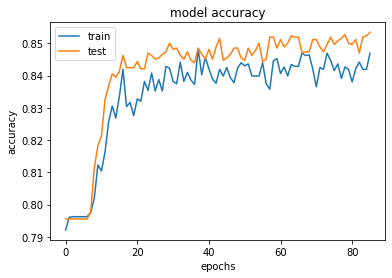

In [27]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [28]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>=0.5)



63/63 [==============================] - 0s 1ms/step


In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm

array([[1497,   98],
       [ 203,  202]])

In [30]:
from sklearn.metrics import accuracy_score
score  =  accuracy_score(Y_test,y_pred)
score

0.8495